In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
# Carga de data set de GitHub y verificación de carga correcta

df = pd.read_csv('https://github.com/wblester-vite/Fraud-Challenge-ML-Exploraci-n-y-Predicci-n/raw/refs/heads/main/fraud_challenge_150k.zip')
df.head()

account_age_days  transaction_amt  transaction_adj_amt  historic_velocity  \
0            3371.0           2167.0                 56.0             2572.0   
1            2714.0           2045.0                 48.0             4517.0   
2            6987.0           2892.0                 61.0             5007.0   
3            2712.0           3040.0                 28.0             6022.0   
4            3598.0           2976.0                 66.0             2600.0   

       ip_address                                         user_agent  \
0   154.68.49.124  Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...   
1   39.131.125.85  Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...   
2  166.245.194.83  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...   
3   100.1.217.216  Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...   
4  113.156.65.245  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...   

         email_domain           phone_number    billing_city  billing_postal  \
0     perez-garza.com           878-111-5140      Woodsburgh         96336.0   
1   mcneil-ortega.com          (002)736-0139      West Kevin         78083.0   
2  davis-calderon.com      (983)585-2863x652     Lorichester         83236.0   
3        rose-lee.org  +1-678-897-3420x60738    Stephenmouth         78364.0   
4            nash.net    (013)204-1766x92641  New Brianmouth         77499.0   

   ... transaction_env      EVENT_TIMESTAMP   applicant_name  \
0  ...               X  2020-12-29 09:05:51     Linda Wright   
1  ...               W  2021-06-22 18:05:06     Terri Rivera   
2  ...               X  2021-05-10 13:48:38       Sarah Gray   
3  ...               N  2021-03-11 07:36:40  Valerie Jenkins   
4  ...               G  2021-03-27 06:13:35      Amy Coleman   

     billing_address  merchant_id  locale tranaction_initiate  \
0  4684 Sharon Ranch  066-82-8795  niu_NZ                   O   
1  7642 Allison Ramp  669-99-9459  apn_IN                   J   
2  4948 Lisa Passage  086-41-1624   dv_MV                   T   
3   1616 Little Camp  669-97-4021  byn_ER                   M   
4   149 Harris Rapid  088-21-6329  the_NP                   K   

  days_since_last_logon inital_amount EVENT_LABEL  
0                  59.0       13646.0       legit  
1                   0.0       11930.0       legit  
2                  83.0        7412.0       legit  
3                  24.0        4623.0       legit  
4                  21.0        1905.0       legit  

[5 rows x 26 columns]

In [5]:
# Variables de nuestro data set

df.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'user_agent', 'email_domain',
       'phone_number', 'billing_city', 'billing_postal', 'billing_state',
       'card_bin', 'currency', 'cvv', 'signature_image', 'transaction_type',
       'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name',
       'billing_address', 'merchant_id', 'locale', 'tranaction_initiate',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

<Axes: >

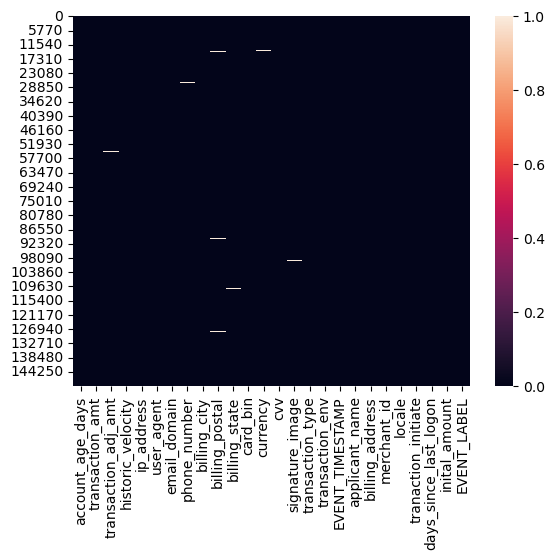

In [7]:
# Visualización valores nulos

sns.heatmap(df.isnull())

In [9]:
# Eliminación valores nulos

df.dropna(inplace=True)

In [11]:
# Tipo de datos

df.dtypes

account_age_days         float64
transaction_amt          float64
transaction_adj_amt      float64
historic_velocity        float64
ip_address                object
user_agent                object
email_domain              object
phone_number              object
billing_city              object
billing_postal           float64
billing_state             object
card_bin                 float64
currency                  object
cvv                       object
signature_image           object
transaction_type          object
transaction_env           object
EVENT_TIMESTAMP           object
applicant_name            object
billing_address           object
merchant_id               object
locale                    object
tranaction_initiate       object
days_since_last_logon    float64
inital_amount            float64
EVENT_LABEL               object
dtype: object

In [13]:
# Cantidad valores únicos

df.nunique()

account_age_days           6465
transaction_amt            3687
transaction_adj_amt          92
historic_velocity          6745
ip_address                13633
user_agent                 8796
email_domain               7124
phone_number              12189
billing_city               9169
billing_postal            11299
billing_state                50
card_bin                   6479
currency                      3
cvv                          26
signature_image              26
transaction_type             26
transaction_env              26
EVENT_TIMESTAMP          146678
applicant_name            95991
billing_address          146994
merchant_id              146991
locale                      293
tranaction_initiate          26
days_since_last_logon       101
inital_amount             14001
EVENT_LABEL                   2
dtype: int64

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_11364\2745134538.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['EVENT_LABEL'].value_counts(),


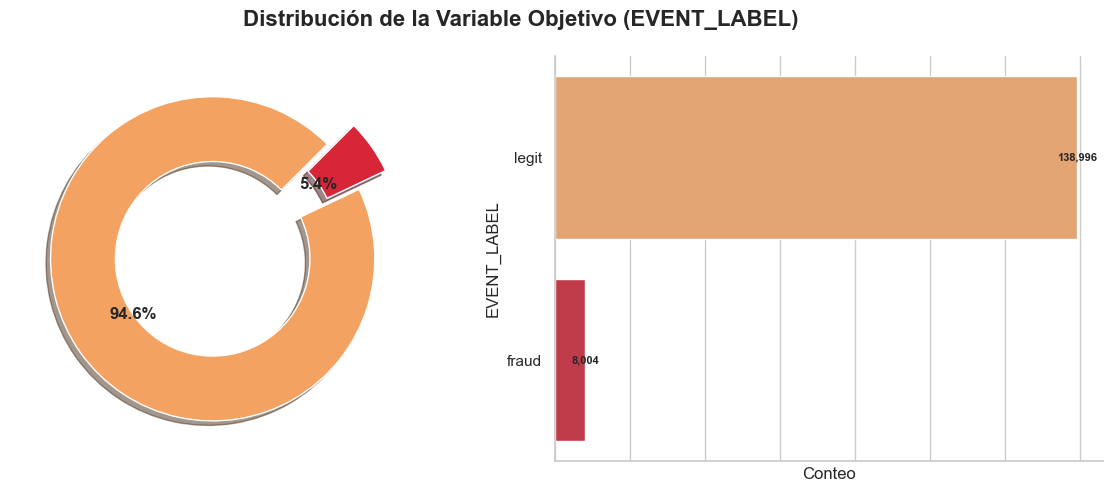

In [15]:
# Ya que 'EVENT_LABEL' es de tipo binario y una variable categórica la vamos a definir como nuestra variable objetivo y graficamos su distribución

sns.set(style="whitegrid", palette="pastel")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#F4A261', '#D72638']
ax[0].pie(df['EVENT_LABEL'].value_counts(),
          explode=[0.0, 0.2],
          startangle=45,
          shadow=True,
          colors=colors,
          autopct='%.1f%%',
          textprops={'fontsize': 12, 'weight': 'bold'},
          wedgeprops=dict(width=0.4, edgecolor='w'))

colores_personalizados = ["#F4A261", "#D72638"]
sns.barplot(x=df['EVENT_LABEL'].value_counts(),
            y=df['EVENT_LABEL'].value_counts().index,
            ax=ax[1],
            palette=colores_personalizados)

ax[1].set(xlabel='Conteo', ylabel='EVENT_LABEL')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

val_count = df['EVENT_LABEL'].value_counts()
for i, v in enumerate(val_count):
    ax[1].text(v, i, f"{v:,}", ha='center', va='center', fontdict={'fontsize': 8, 'fontweight': 'bold'})

fig.suptitle('Distribución de la Variable Objetivo (EVENT_LABEL)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


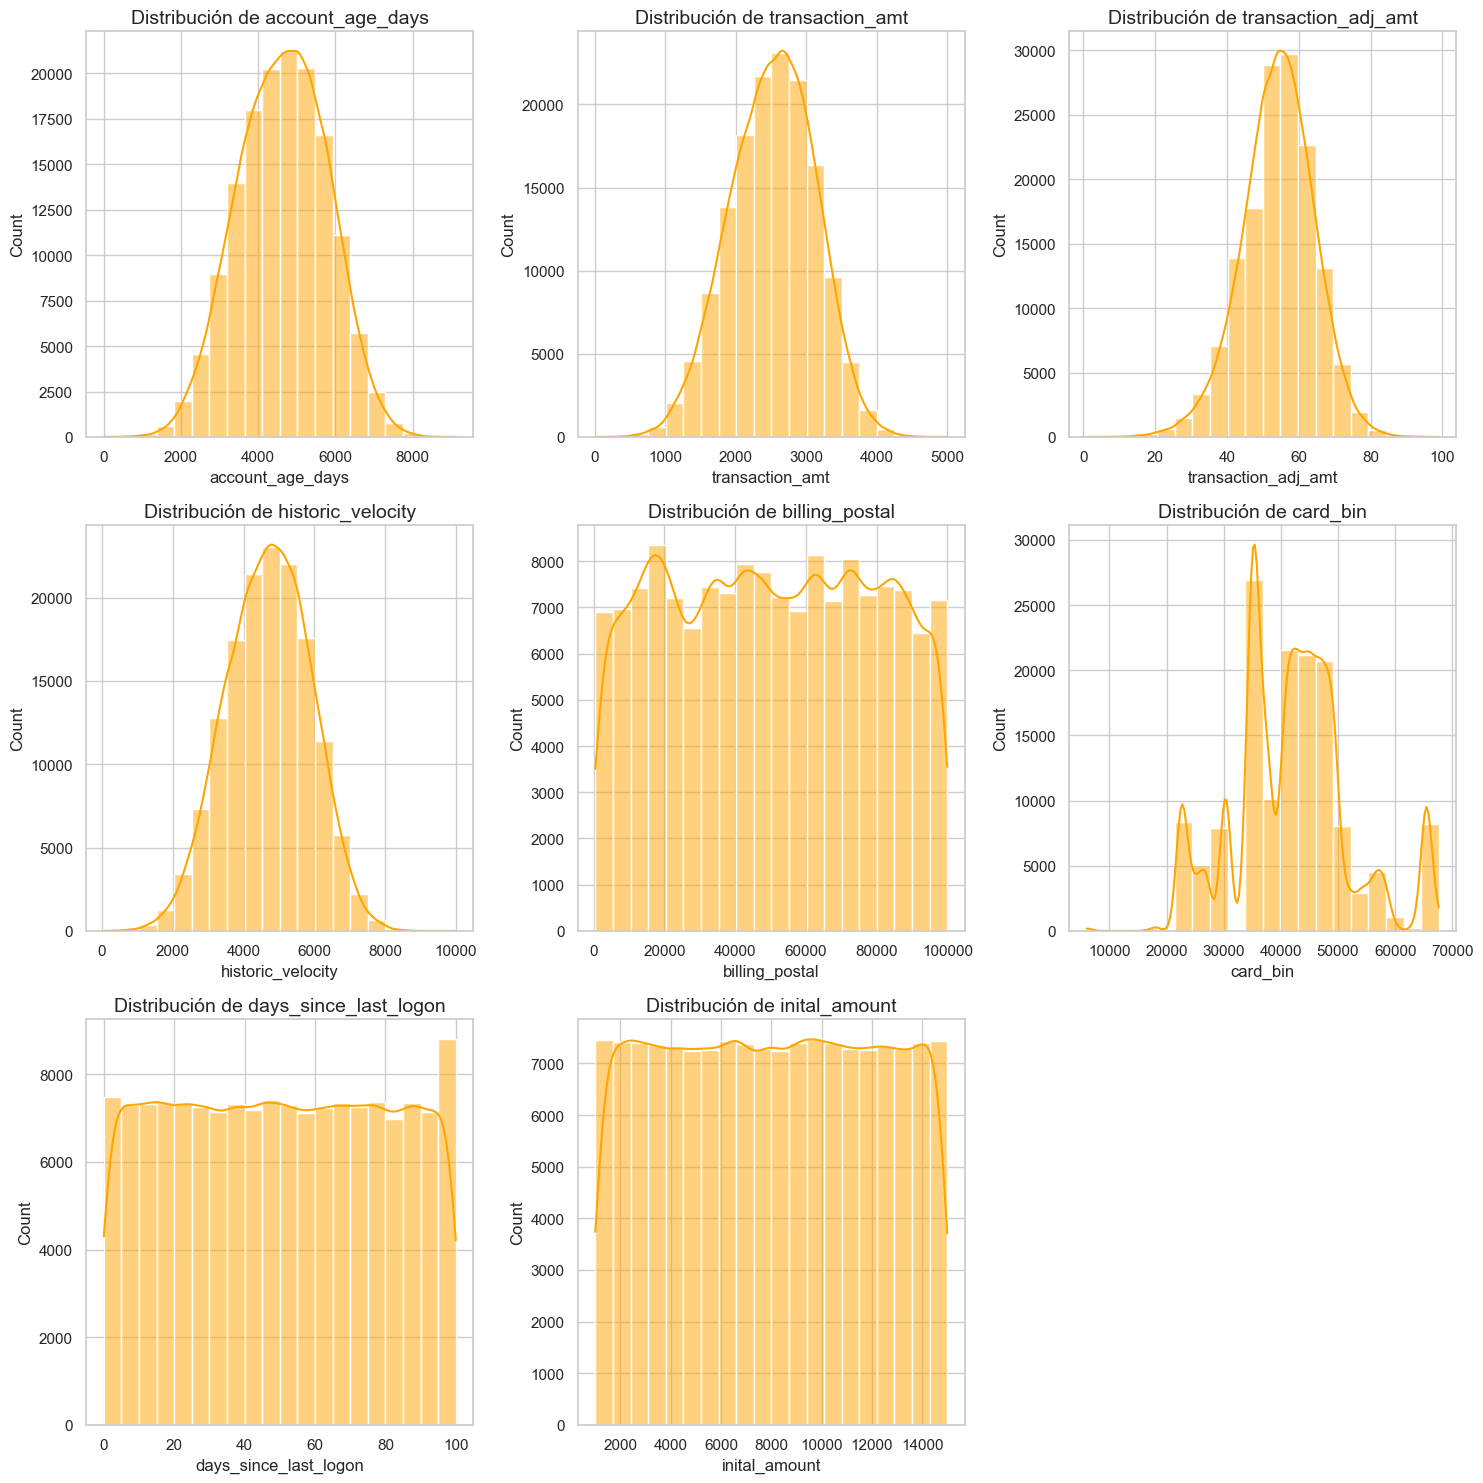

In [17]:
# Distribución variables numéricas

columnas = df.columns

numeric_variables = [col for col in columnas if col in df.columns and df[col].dtype in ['float64', 'int64']]

num_vars = len(numeric_variables)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, variable in enumerate(numeric_variables):
    sns.histplot(df[variable], bins=20, kde=True, ax=axes[i], color="orange")
    axes[i].set_title(f"Distribución de {variable}", fontsize=14)
    axes[i].set_xlabel(variable, fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [19]:
# Resumen datos

def summary(df):
    data_info = pd.DataFrame(index=df.columns)
    data_info['Data Type'] = df.dtypes
    data_info['Non-Null Count'] = df.count()
    data_info['Missing Count'] = df.isna().sum()
    data_info['Missing Percentage'] = df.isna().mean() * 100

    data_stats = df.describe().T.drop('count', axis=1)

    print("Data Information:")
    display(data_info)

    print("\nDescriptive Statistics:")
    display(data_stats)

summary(df)

Data Information:


Data Type  Non-Null Count  Missing Count  \
account_age_days        float64          147000              0   
transaction_amt         float64          147000              0   
transaction_adj_amt     float64          147000              0   
historic_velocity       float64          147000              0   
ip_address               object          147000              0   
user_agent               object          147000              0   
email_domain             object          147000              0   
phone_number             object          147000              0   
billing_city             object          147000              0   
billing_postal          float64          147000              0   
billing_state            object          147000              0   
card_bin                float64          147000              0   
currency                 object          147000              0   
cvv                      object          147000              0   
signature_image          object          147000              0   
transaction_type         object          147000              0   
transaction_env          object          147000              0   
EVENT_TIMESTAMP          object          147000              0   
applicant_name           object          147000              0   
billing_address          object          147000              0   
merchant_id              object          147000              0   
locale                   object          147000              0   
tranaction_initiate      object          147000              0   
days_since_last_logon   float64          147000              0   
inital_amount           float64          147000              0   
EVENT_LABEL              object          147000              0   

                       Missing Percentage  
account_age_days                      0.0  
transaction_amt                       0.0  
transaction_adj_amt                   0.0  
historic_velocity                     0.0  
ip_address                            0.0  
user_agent                            0.0  
email_domain                          0.0  
phone_number                          0.0  
billing_city                          0.0  
billing_postal                        0.0  
billing_state                         0.0  
card_bin                              0.0  
currency                              0.0  
cvv                                   0.0  
signature_image                       0.0  
transaction_type                      0.0  
transaction_env                       0.0  
EVENT_TIMESTAMP                       0.0  
applicant_name                        0.0  
billing_address                       0.0  
merchant_id                           0.0  
locale                                0.0  
tranaction_initiate                   0.0  
days_since_last_logon                 0.0  
inital_amount                         0.0  
EVENT_LABEL                           0.0


Descriptive Statistics:


mean           std     min      25%      50%  \
account_age_days        4645.817224   1153.792072     1.0   3824.0   4668.0   
transaction_amt         2521.343592    604.680167     5.0   2103.0   2543.0   
transaction_adj_amt       54.208837     10.068128     1.0     48.0     55.0   
historic_velocity       4702.388673   1188.255402    50.0   3872.0   4729.0   
billing_postal         50179.458129  28389.219411   503.0  25298.0  50072.0   
card_bin               41834.312320  10082.094148  6040.0  35386.0  42086.0   
days_since_last_logon     49.858524     29.208844     0.0     24.0     50.0   
inital_amount           7996.856367   4047.922681  1000.0   4485.0   7999.0   

                           75%      max  
account_age_days        5476.0   9119.0  
transaction_amt         2951.0   4999.0  
transaction_adj_amt       61.0     99.0  
historic_velocity       5548.0   9999.0  
billing_postal         74346.0  99950.0  
card_bin               47373.0  67639.0  
days_since_last_logon     75.0    100.0  
inital_amount          11495.0  15000.0

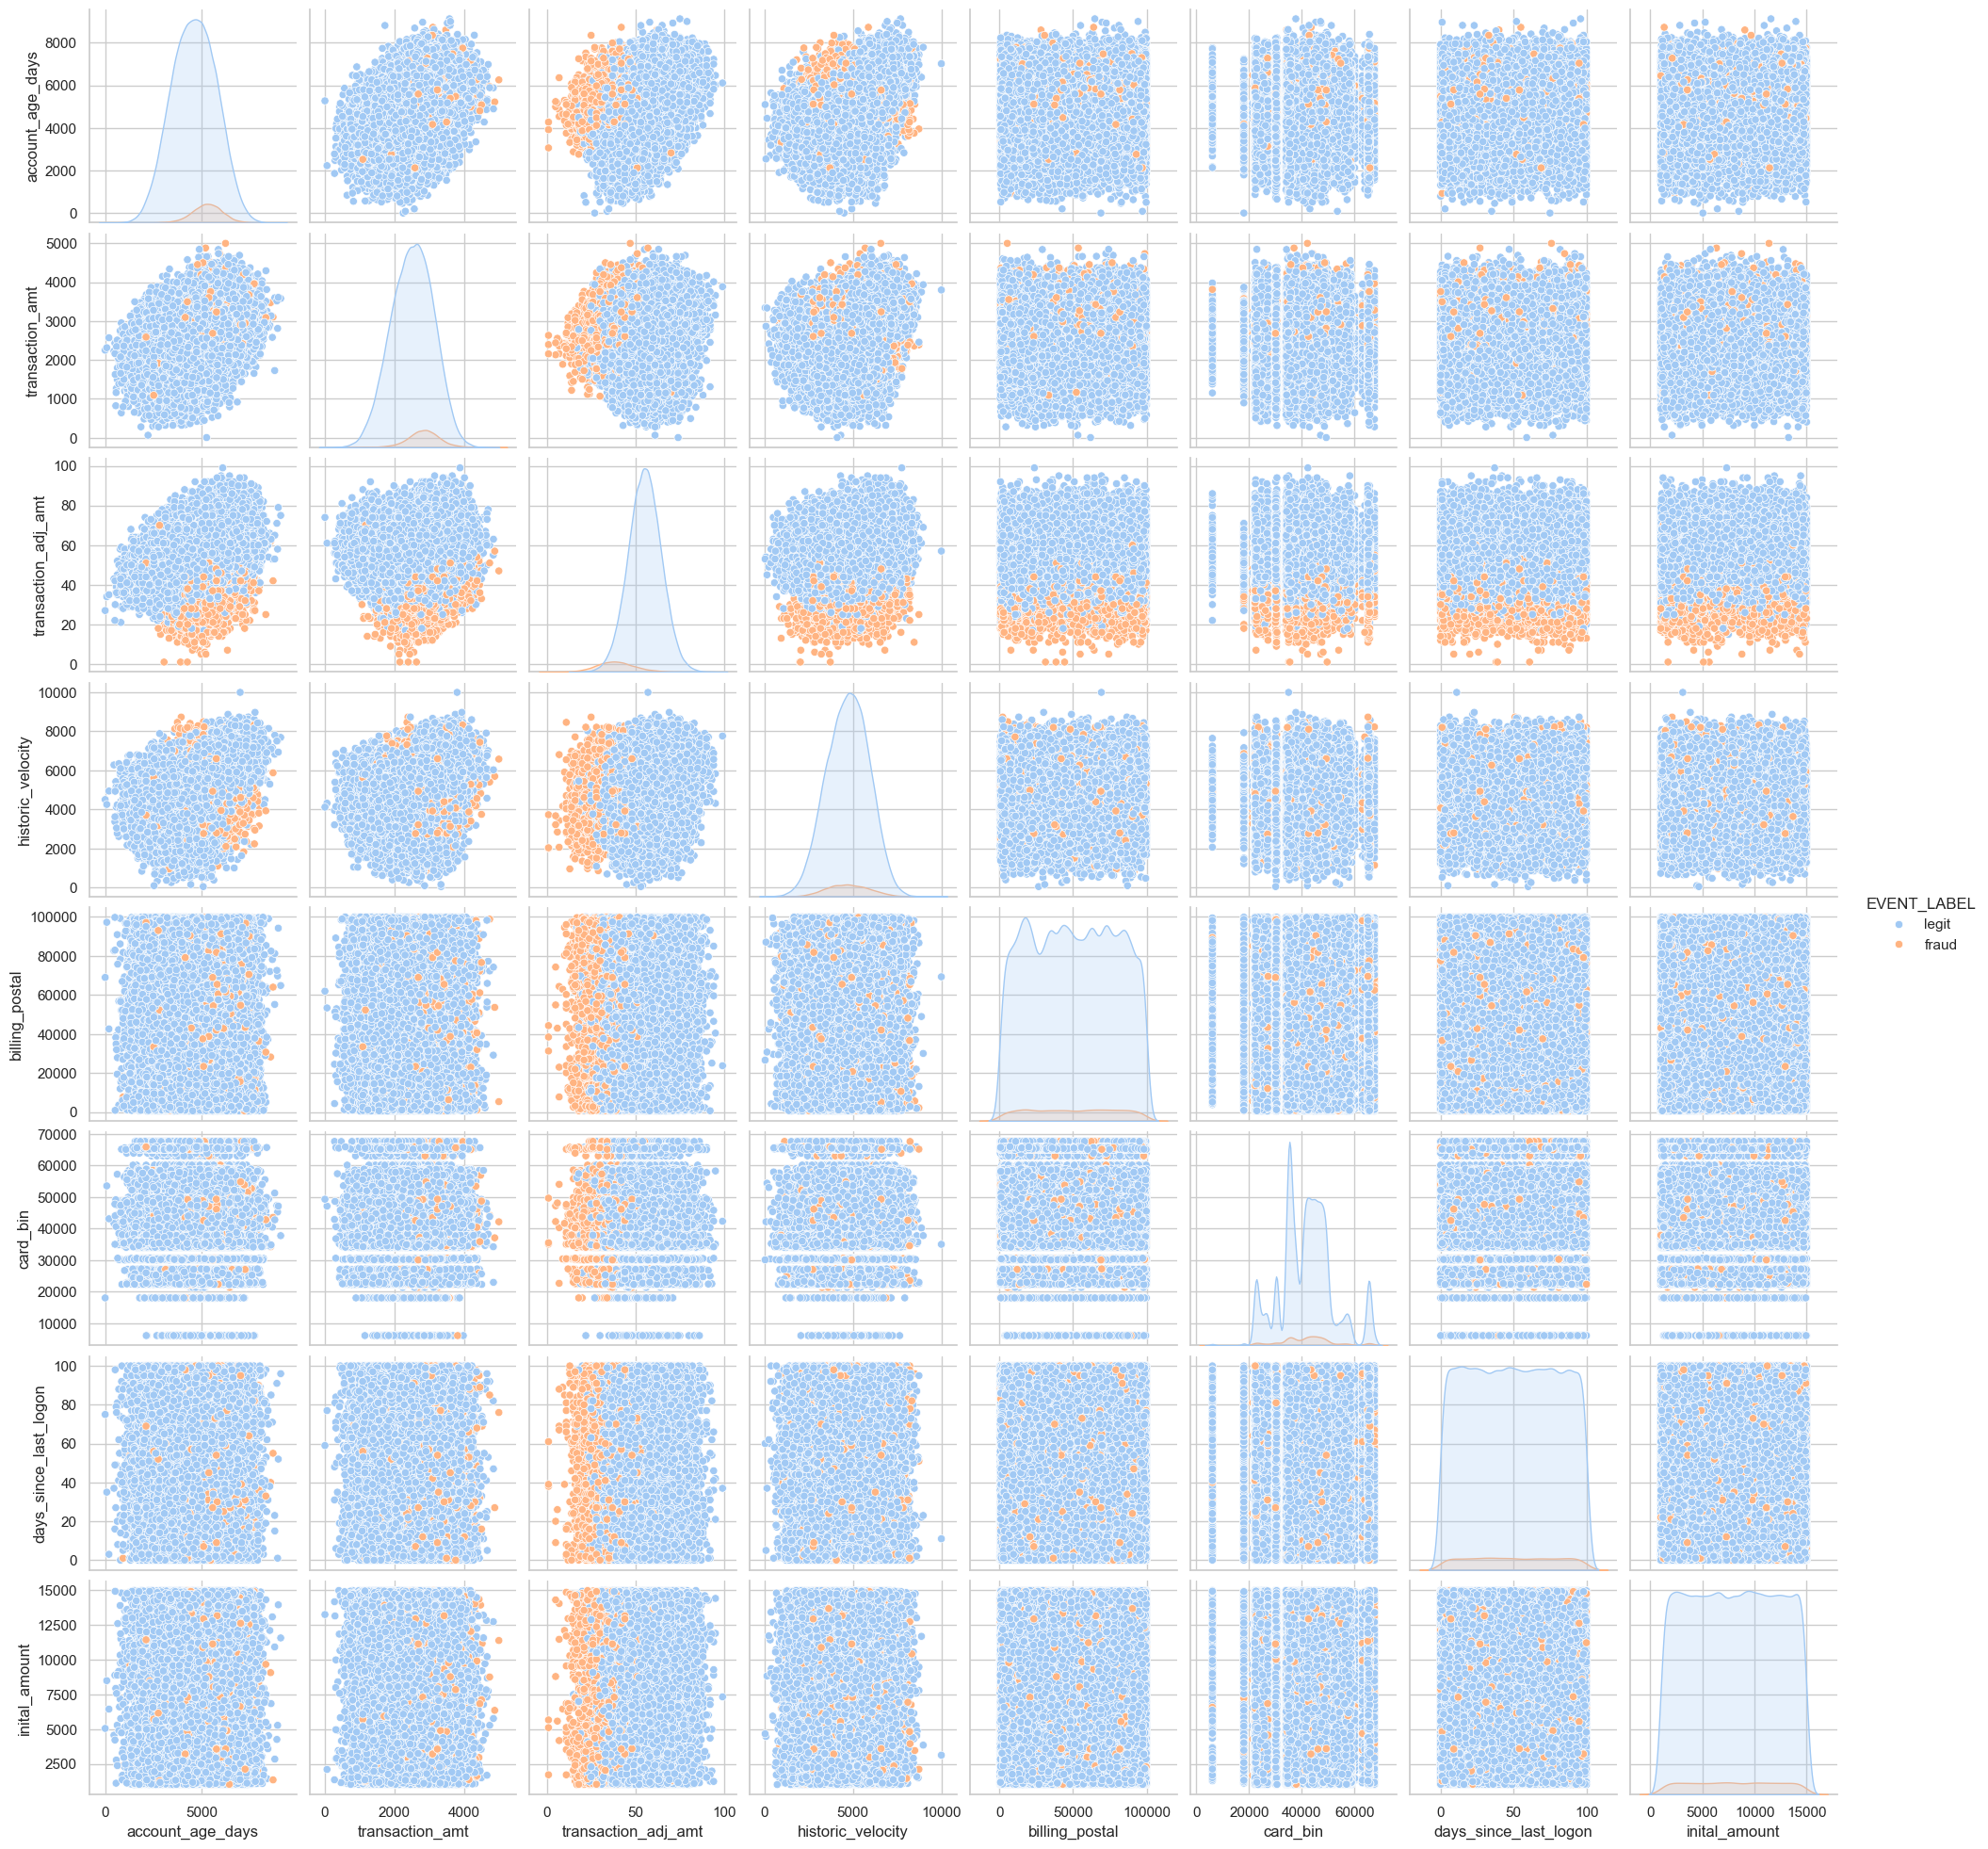

In [44]:
# Matriz de dispersión

df_numerico = df[numeric_variables + ['EVENT_LABEL']].copy()

sns.pairplot(df_numerico, hue='EVENT_LABEL', diag_kind='kde')
plt.show()

In [28]:
# Codificación de variables categóricas a numéricas

df_codificado = df.copy()
def map_categorical_columns(df, categorical_columns):
    df_copy = df.copy()
    mappings = {}
    for column in categorical_columns:
        unique_values = df_copy[column].dropna().unique()
        mapping = {value: idx for idx, value in enumerate(unique_values)}
        mappings[column] = mapping
        df_copy[column] = df_copy[column].map(mapping)
    return df_copy, mappings

categorical_columns = ['ip_address', 'user_agent', 'email_domain', 'phone_number',
                       'billing_city', 'billing_postal', 'billing_state', 'card_bin',
                       'currency', 'cvv', 'signature_image', 'transaction_type',
                       'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address',
                       'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']

df_codificado, mappings = map_categorical_columns(df_codificado, categorical_columns)

summary(df_codificado)

Data Information:


Data Type  Non-Null Count  Missing Count  \
account_age_days        float64          147000              0   
transaction_amt         float64          147000              0   
transaction_adj_amt     float64          147000              0   
historic_velocity       float64          147000              0   
ip_address                int64          147000              0   
user_agent                int64          147000              0   
email_domain              int64          147000              0   
phone_number              int64          147000              0   
billing_city              int64          147000              0   
billing_postal            int64          147000              0   
billing_state             int64          147000              0   
card_bin                  int64          147000              0   
currency                  int64          147000              0   
cvv                       int64          147000              0   
signature_image           int64          147000              0   
transaction_type          int64          147000              0   
transaction_env           int64          147000              0   
EVENT_TIMESTAMP           int64          147000              0   
applicant_name            int64          147000              0   
billing_address           int64          147000              0   
merchant_id               int64          147000              0   
locale                    int64          147000              0   
tranaction_initiate       int64          147000              0   
days_since_last_logon   float64          147000              0   
inital_amount           float64          147000              0   
EVENT_LABEL               int64          147000              0   

                       Missing Percentage  
account_age_days                      0.0  
transaction_amt                       0.0  
transaction_adj_amt                   0.0  
historic_velocity                     0.0  
ip_address                            0.0  
user_agent                            0.0  
email_domain                          0.0  
phone_number                          0.0  
billing_city                          0.0  
billing_postal                        0.0  
billing_state                         0.0  
card_bin                              0.0  
currency                              0.0  
cvv                                   0.0  
signature_image                       0.0  
transaction_type                      0.0  
transaction_env                       0.0  
EVENT_TIMESTAMP                       0.0  
applicant_name                        0.0  
billing_address                       0.0  
merchant_id                           0.0  
locale                                0.0  
tranaction_initiate                   0.0  
days_since_last_logon                 0.0  
inital_amount                         0.0  
EVENT_LABEL                           0.0


Descriptive Statistics:


mean           std     min       25%      50%  \
account_age_days        4645.817224   1153.792072     1.0   3824.00   4668.0   
transaction_amt         2521.343592    604.680167     5.0   2103.00   2543.0   
transaction_adj_amt       54.208837     10.068128     1.0     48.00     55.0   
historic_velocity       4702.388673   1188.255402    50.0   3872.00   4729.0   
ip_address              5084.847789   3285.283284     0.0   2293.00   4758.0   
user_agent              2794.888728   1885.166728     0.0   1226.00   2543.0   
email_domain            2465.764211   1599.684714     0.0   1129.00   2289.0   
phone_number            4557.280333   2931.050469     0.0   2084.00   4266.0   
billing_city            3301.090048   2133.266325     0.0   1494.75   3079.0   
billing_postal          4149.970912   2679.332617     0.0   1869.00   3879.0   
billing_state             12.656748      8.271907     0.0      5.00     13.0   
card_bin                2000.132816   1369.018167     0.0    868.00   1817.0   
currency                   0.270497      0.505880     0.0      0.00      0.0   
cvv                        4.743211      3.985046     0.0      1.00      4.0   
signature_image            6.458619      4.108174     0.0      3.00      7.0   
transaction_type           6.836299      4.879913     0.0      3.00      6.0   
transaction_env            4.807633      3.674571     0.0      1.00      4.0   
EVENT_TIMESTAMP        73280.161701  42345.242700     0.0  36602.75  73247.5   
applicant_name         39715.896150  27945.120807     0.0  14602.75  35688.5   
billing_address        73495.731476  42433.414761     0.0  36748.75  73494.5   
merchant_id            73494.229973  42432.283749     0.0  36747.75  73494.5   
locale                   109.080782     68.455292     0.0     49.00    104.0   
tranaction_initiate       12.503000      7.493654     0.0      6.00     12.0   
days_since_last_logon     49.858524     29.208844     0.0     24.00     50.0   
inital_amount           7996.856367   4047.922681  1000.0   4485.00   7999.0   
EVENT_LABEL                0.054449      0.226902     0.0      0.00      0.0   

                             75%       max  
account_age_days         5476.00    9119.0  
transaction_amt          2951.00    4999.0  
transaction_adj_amt        61.00      99.0  
historic_velocity        5548.00    9999.0  
ip_address               7549.00   13632.0  
user_agent               4093.00    8795.0  
email_domain             3639.00    7123.0  
phone_number             6775.00   12188.0  
billing_city             4890.00    9168.0  
billing_postal           6167.00   11298.0  
billing_state              18.00      49.0  
card_bin                 2917.00    6478.0  
currency                    0.00       2.0  
cvv                         8.00      25.0  
signature_image             9.00      25.0  
transaction_type           11.00      25.0  
transaction_env             7.00      25.0  
EVENT_TIMESTAMP        109948.25  146677.0  
applicant_name          62615.25   95990.0  
billing_address        110244.25  146993.0  
merchant_id            110241.25  146990.0  
locale                    163.00     292.0  
tranaction_initiate        19.00      25.0  
days_since_last_logon      75.00     100.0  
inital_amount           11495.00   15000.0  
EVENT_LABEL                 0.00       1.0

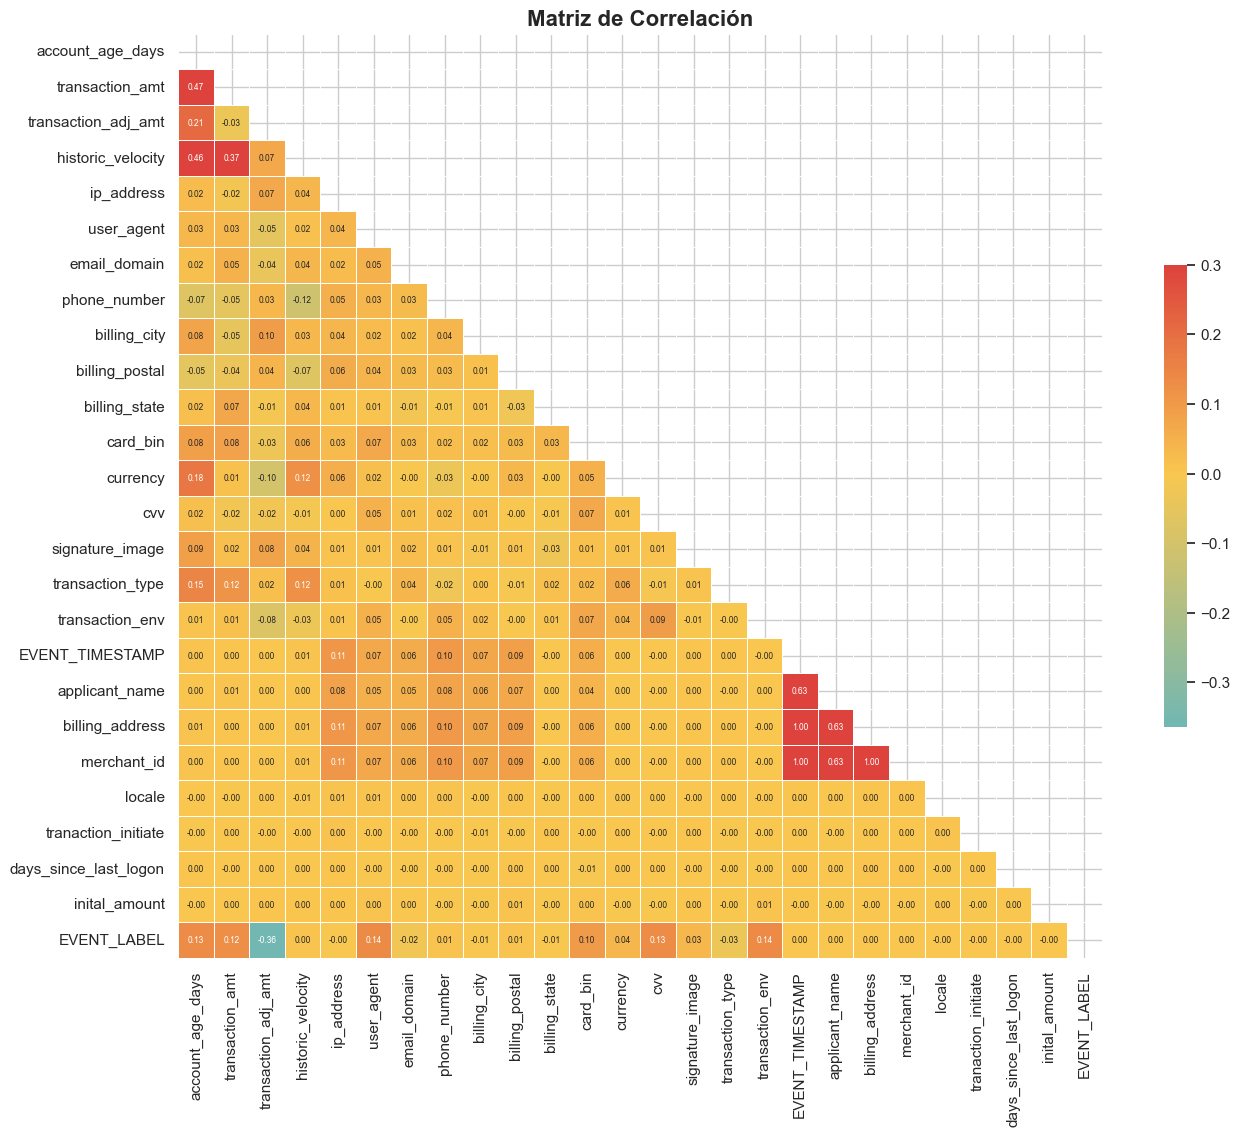

In [30]:
# Matriz de correlación (Se hizo de esta manera porque a la hora de hacerla normal no se podía visualizar correctamente los datos)

def plot_correlation_heatmap(corr_matrix):
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(16, 12))
    cmap = LinearSegmentedColormap.from_list('my_colormap', ['#72B7B2', '#F9C74F', '#D72638'])
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True, fmt='.2f', annot_kws={'size': 6})

    plt.title('Matriz de Correlación', fontdict={'fontweight': 'bold', 'fontsize': 16})
    plt.show()

plot_correlation_heatmap(df_codificado.corr())

In [32]:
# Se encontró multicolinealidad en algunas variables por lo que se decidió eliminarlas

df_codificado = df_codificado.drop(['billing_address', 'merchant_id', 'applicant_name'], axis=1)

In [34]:
# Construcción del modelo

X = df_codificado.drop('EVENT_LABEL', axis=1)
y = df_codificado['EVENT_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(class_weight="balanced", max_iter=1000, solver='saga', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

class_report = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:\n", class_report)


Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93     27844
           1       0.28      0.87      0.42      1556

    accuracy                           0.87     29400
   macro avg       0.64      0.87      0.68     29400
weighted avg       0.95      0.87      0.90     29400



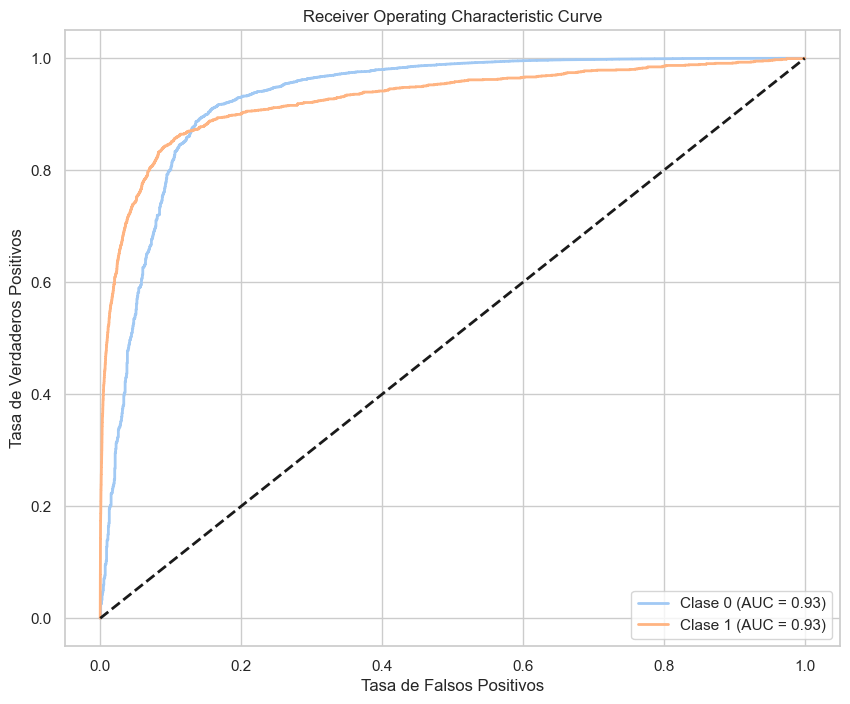

In [36]:
# Grafica ROC

y_prob = model.predict_proba(X_test_scaled)
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve((y_test == model.classes_[i]).astype(int), y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

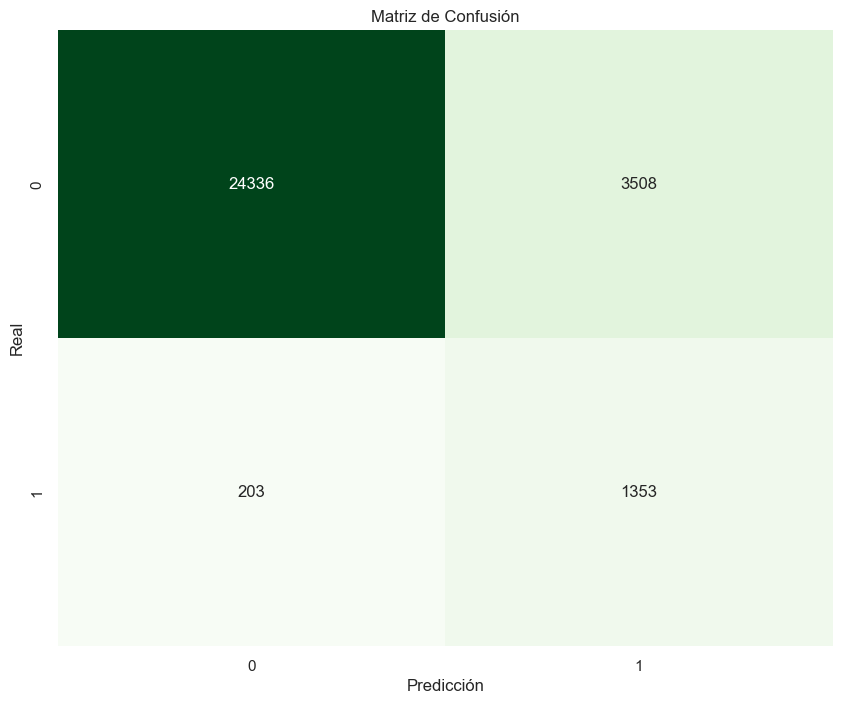

In [38]:
# Matriz de Confusión

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [40]:
# Precisión del Modelo

a1 = conf_matrix[0, 0]
a2 = conf_matrix[0, 1]
b1 = conf_matrix[1, 0]
b2 = conf_matrix[1, 1]

precision_a = a1 / (a1 + a2)
precision_b = b2 / (b1 + b2)
precision = (a1 + b2) / (a1 + a2 + b1 + b2)

print(f"Precisión de la clase 0: {precision_a:.2%}")
print(f"Precisión de la clase 1: {precision_b:.2%}")
print(f"Precisión general: {precision:.2%}")

Precisión de la clase 0: 87.40%
Precisión de la clase 1: 86.95%
Precisión general: 87.38%


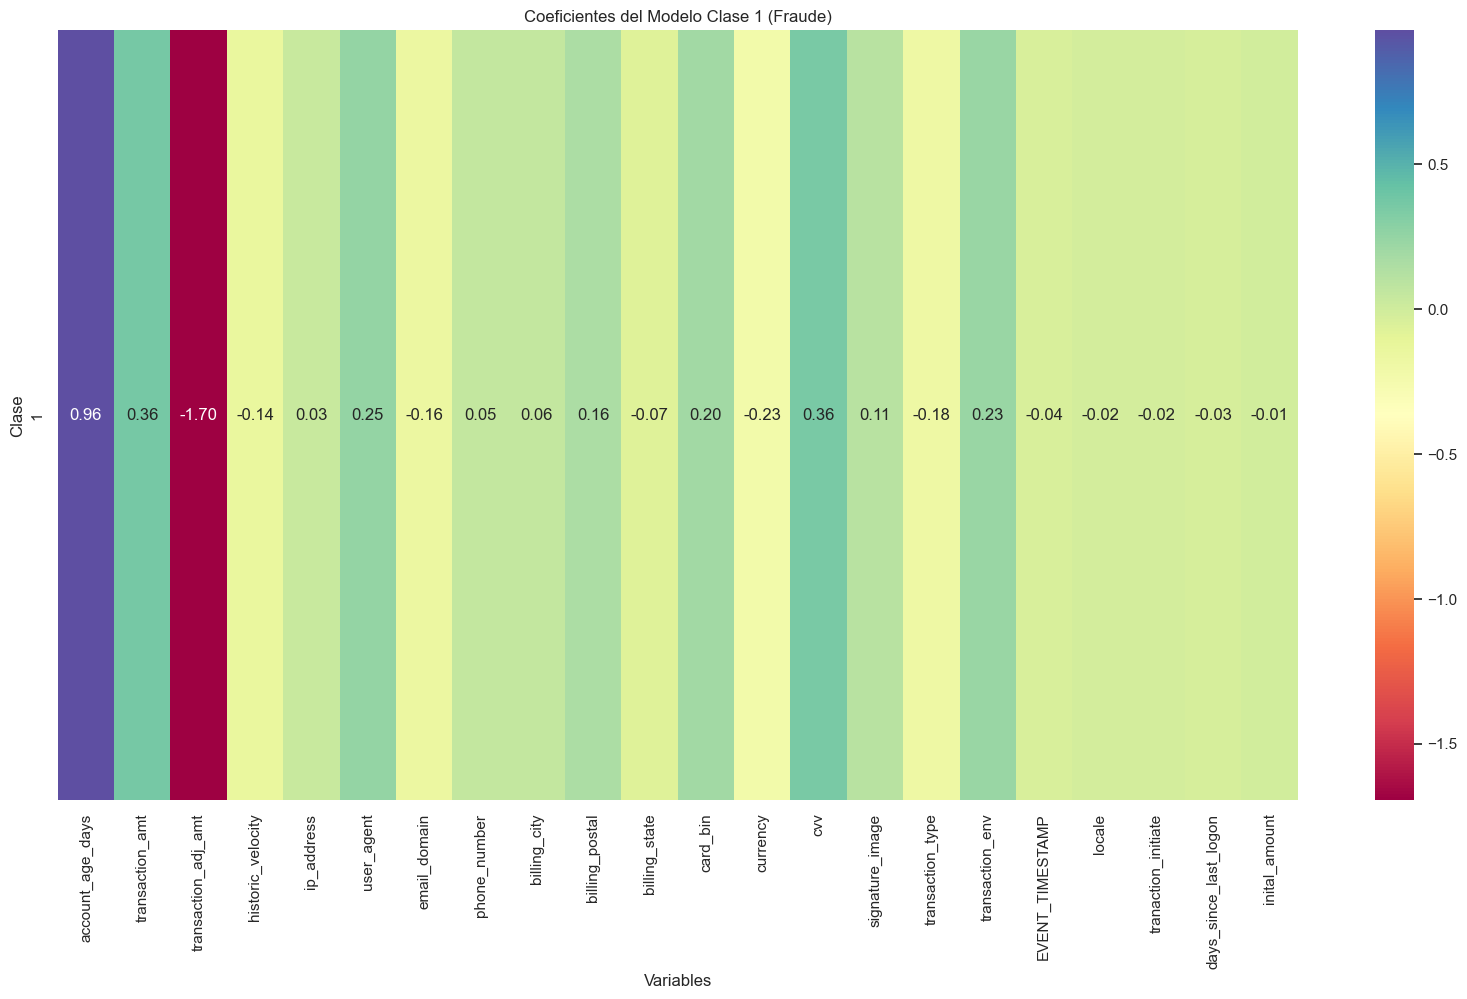

In [42]:
# Grafica coeficientes

coefficients = pd.DataFrame(model.coef_, columns=X.columns, index=[1])

plt.figure(figsize=(20, 10))
sns.heatmap(coefficients, annot=True, cmap='Spectral', cbar=True, fmt=".2f")
plt.title('Coeficientes del Modelo Clase 1 (Fraude)')
plt.xlabel('Variables')
plt.ylabel('Clase')
plt.show()